In [1]:
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from config import *
from tools import *
from features import *

import pickle

df = read_object('df_train_full_0_4_risk-size-watershed_node_None.pkl', Path('firemen/firepoint/2x2/train/occurence_test_geometry'))
features, train_features, kmeans_features = get_features_for_sinister_prediction('firemen', 'firepoint', False)

features_name, newShape = get_features_name_list(6, train_features, ['mean'])
features_name = [fet for fet in features_name if fet in df.columns]
features_name_2D, newShape2D = get_features_name_lists_2D(6, train_features)
features_selected_str = ['12', 'AutoRegressionBin-B-1', 'Chênes décidus', 'Conifer', 'Crop', 'Douglas',
                         'Feuillus', 'Hêtre', 'NC', 'NO2', 'O3', 'PM10', 'PM25', 'PasDeRoute', 'Water surface', 'angstroem',
                         'calendar_mean', 'calendar_min', 'calendar_sum', 'cluster_encoder', 'cosia_encoder', 'couvrefeux', 'days_since_rain',
                         'departement_encoder', 'dwpt', 'ffmc', 'holidays', 'kbdi', 'motorway', 'nesterov', 'pastinfluence', 'path', 'prec24h', 'prec24h16',
                         'primary', 'ramadan', 'rhum', 'rhum16', 'secondary', 'snow24h16', 'sum_snow_last_7_days', 'temp16', 'tertiary', 'wdir', 'wdir16', 'wspd', 'wspd16']


array = pickle.load(open('/media/caron/X9 Pro/travaille/Thèse/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/firemen/firepoint/2x2/train/2D_database_4_risk-size-watershed_node/image_per_node/z-score/train/X_262_1_0.pkl', 'rb'))
print(array.shape)

/home/caron/Bureau/.conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Nom de l'hôte : caron-Precision-7780
Adresse IP locale : 127.0.1.1


/home/caron/Bureau/.conda/lib/python3.9/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Nom de l'hôte : caron-Precision-7780
Adresse IP locale : 127.0.1.1
(47, 15, 15, 1)


In [1]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd

# Générer un dataset déséquilibré (exemple)
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=3, class_sep=2, 
                           weights=[0.1, 0.3, 0.6],  # Classes déséquilibrées
                           n_informative=5, n_redundant=1, 
                           flip_y=0, n_features=10, 
                           n_clusters_per_class=1, 
                           n_samples=1000, random_state=42)

# Afficher la répartition des classes avant SMOTE
print("Répartition avant SMOTE:", Counter(y))

# Appliquer SMOTE
smote = SMOTE(random_state=42, )
X_resampled, y_resampled = smote.fit_resample(X, y)

# Afficher la répartition des classes après SMOTE
print("Répartition après SMOTE:", Counter(y_resampled))


Répartition avant SMOTE: Counter({2: 600, 1: 300, 0: 100})
Répartition après SMOTE: Counter({1: 600, 2: 600, 0: 600})


In [73]:
# Fonction pour calculer la somme dans une fenêtre de rolling, incluant les fenêtres inversées
def calculate_rolling_sum(dataset, column, shifts, group_col, func):
    """
    Calcule la somme rolling sur une fenêtre donnée pour chaque groupe.
    Combine les fenêtres normales et inversées.

    :param dataset: Le DataFrame Pandas.
    :param column: Colonne sur laquelle appliquer le rolling.
    :param shifts: Taille de la fenêtre rolling.
    :param group_col: Colonne pour le groupby.
    :param func: Fonction à appliquer sur les fenêtres.
    :return: Colonne calculée avec la somme rolling bidirectionnelle.
    """
    # Rolling forward
    forward_rolling = (
        dataset
        .groupby(group_col)[column]
        .rolling(window=shifts, min_periods=1)
        .apply(func, raw=True)
    ).values
    
    # Rolling backward (inversé)
    backward_rolling = (
        dataset.iloc[::-1]
        .groupby(group_col)[column]
        .rolling(window=shifts, min_periods=1)
        .apply(func, raw=True)
        .iloc[::-1]  # Remettre dans l'ordre original
    ).values

    print(forward_rolling, backward_rolling)
    
    # Somme des deux fenêtres
    return forward_rolling

In [77]:
import pandas as pd
import numpy as np

# Example data
data = {
    'graph' : [0,0,0,0,0, 1,1,1,1,1],
    'value': [0, 1, 0, 1, 0, 2,0,2,5,0],
}
df = pd.DataFrame(data)

val = calculate_rolling_sum(df, 'value', 3, 'graph', lambda x : np.nansum(x))

val

[0. 1. 1. 2. 1. 2. 2. 4. 7. 7.] [4. 7. 7. 5. 0. 1. 2. 1. 1. 0.]


array([0., 1., 1., 2., 1., 2., 2., 4., 7., 7.])

In [32]:
df.iloc[::-1].groupby('graph')['value'].rolling(window=2).apply(np.nansum).iloc[::-1]

graph   
0      0    30.0
       1    50.0
       2    70.0
       3    90.0
       4     NaN
Name: value, dtype: float64

In [36]:
df.groupby('graph')['value'].rolling(window=1).apply(np.nansum)

graph   
0      0    10.0
       1    20.0
       2    30.0
       3    40.0
       4    50.0
Name: value, dtype: float64

In [5]:
df['value'].iloc[::-1].rolling(window=3).mean().iloc[::-1]

0    20.0
1    30.0
2    40.0
3     NaN
4     NaN
Name: value, dtype: float64

In [124]:
features_selected_str

['12',
 'AutoRegressionBin-B-1',
 'Chênes décidus',
 'Conifer',
 'Crop',
 'Douglas',
 'Feuillus',
 'Hêtre',
 'NC',
 'NO2',
 'O3',
 'PM10',
 'PM25',
 'PasDeRoute',
 'Water surface',
 'angstroem',
 'calendar_mean',
 'calendar_min',
 'calendar_sum',
 'cluster_encoder',
 'cosia_encoder',
 'couvrefeux',
 'days_since_rain',
 'departement_encoder',
 'dwpt',
 'ffmc',
 'holidays',
 'kbdi',
 'motorway',
 'nesterov',
 'pastinfluence',
 'path',
 'prec24h',
 'prec24h16',
 'primary',
 'ramadan',
 'rhum',
 'rhum16',
 'secondary',
 'snow24h16',
 'sum_snow_last_7_days',
 'temp16',
 'tertiary',
 'wdir',
 'wdir16',
 'wspd',
 'wspd16']

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvBlock(nn.Module):
    """Bloc de convolutions 2D (Conv2D => BatchNorm => ReLU)"""
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        return self.conv(x)

class DeconvBlock(nn.Module):
    """Bloc de déconvolutions 2D (De-Conv2D)"""
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, output_padding=1):
        super(DeconvBlock, self).__init__()
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding, output_padding=output_padding),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        return self.deconv(x)

class LSTMNetwork(nn.Module):
    """Bloc LSTM pour traiter les caractéristiques extraites"""
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMNetwork, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True)
        
    def forward(self, x):
        # On suppose que x est de taille (batch, time_steps, features)
        lstm_out, _ = self.lstm(x)
        return lstm_out[:, -1, :]  # On prend la dernière sortie du LSTM

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        # Blocs de convolution
        self.conv1 = ConvBlock(1, 64, kernel_size=3, stride=2)  # Convolution initiale (500,500) -> (250,250)
        self.conv2 = ConvBlock(64, 128, kernel_size=3, stride=2) # (250,250) -> (125,125)
        self.conv3 = ConvBlock(128, 256, kernel_size=3, stride=3) # (125,125) -> (41,41)

        # LSTM avec une taille de vecteur de caractéristiques adaptée (par exemple, 26*26)
        self.lstm = LSTMNetwork(input_size=26*26, hidden_size=256)

        # Blocs de déconvolution (pour retourner à la taille d'origine)
        self.deconv1 = DeconvBlock(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.deconv2 = DeconvBlock(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.deconv3 = nn.ConvTranspose2d(64, 1, kernel_size=3, stride=2, padding=1, output_padding=1)  # Dernière couche pour la reconstruction

    def forward(self, x):
        # Passer par les couches convolutionnelles
        x = self.conv1(x)  # (500, 500) -> (250, 250)
        x = self.conv2(x)  # (250, 250) -> (125, 125)
        x = self.conv3(x)  # (125, 125) -> (41, 41)
        
        # Reshape pour préparer l'entrée dans LSTM (on suppose une taille de batch = 1 ici pour simplifier)
        batch_size, channels, height, width = x.size()
        x_lstm_input = x.view(batch_size, channels, height * width)  # (batch, channels, features)

        # Passage dans le LSTM
        x_lstm_output = self.lstm(x_lstm_input)  # LSTM retourne un vecteur (taille cachée)
        
        # Reshape la sortie LSTM pour les couches de déconvolution
        x = x_lstm_output.view(batch_size, channels, height, width)
        
        # Passage dans les couches de déconvolution
        x = self.deconv1(x)  # (41,41) -> (81,81)
        x = self.deconv2(x)  # (81,81) -> (248,248)
        x = self.deconv3(x)  # (248,248) -> (500,500)

        return x

# Exemple d'initialisation et d'utilisation du modèle
model = Model()
input_tensor = torch.randn(1, 1, 500, 500)  # Exemple d'entrée (batch_size, channels, height, width)
output = model(input_tensor)
print(output.shape)  # Devrait être de taille similaire à l'entrée (1, 1, 500, 500)


RuntimeError: input.size(-1) must be equal to input_size. Expected 676, got 1764

In [142]:
features_selected_str[12]

'PM25'

In [138]:
index = features_selected_str.index('cosia_encoder')
index

20

In [139]:
np.unique(array[index, :, :, 0])

array([-1.73569016, -0.6789214 ,  0.42671853,  0.69103407,  0.84943025])

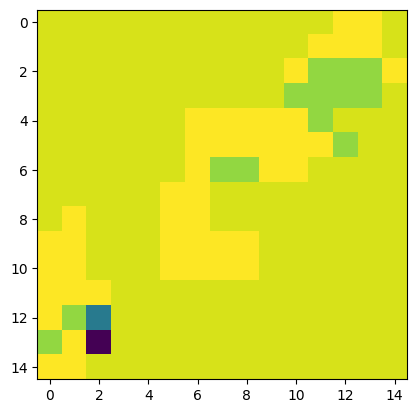

In [140]:
plt.imshow(array[index, :, :, 0])

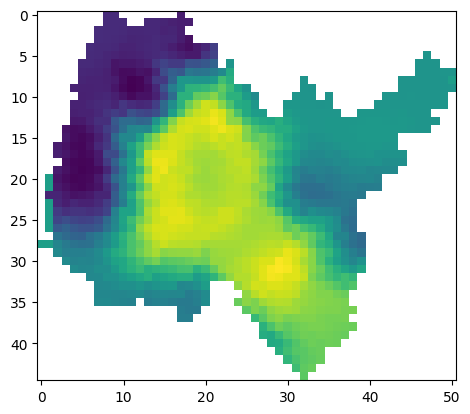

In [76]:
plt.imshow(array[0, :, :])

In [47]:
np.argwhere(np.isnan(array))

array([], shape=(0, 3), dtype=int64)

(21, 61, 30, 30, 1)


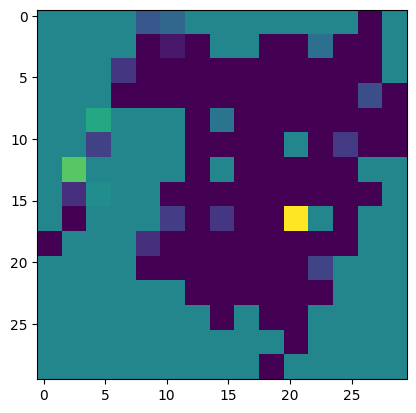

In [92]:
pathdisk = Path('/media/caron/X9 Pro/travaille/Thèse/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/firemen/firepoint/2x2/train/2D_database/image_per_node/z-score/test')
array = pickle.load(open(pathdisk / 'X_2088.pkl', 'rb'))
print(array.shape)
plt.imshow(array[6, 10])

In [ ]:
print(np.max(array[0:,:,6:, 7])), print(np.min(array))

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [ ]:
print(np.argwhere(array == np.max(array)))

[[ 0  0  0  4  7]
 [ 0  0  1  4  7]
 [ 0  0  2  4  7]
 ...
 [17 24 22  4  7]
 [17 24 23  4  7]
 [17 24 24  4  7]]


In [ ]:
np.argwhere(np.isnan(array))

array([], shape=(0, 5), dtype=int64)

In [ ]:
np.unique(array[:,:,0]), np.unique(array[:,:,3]), np.unique(array[:,:,4])

(array([0.]), array([1.]), array([650.]))

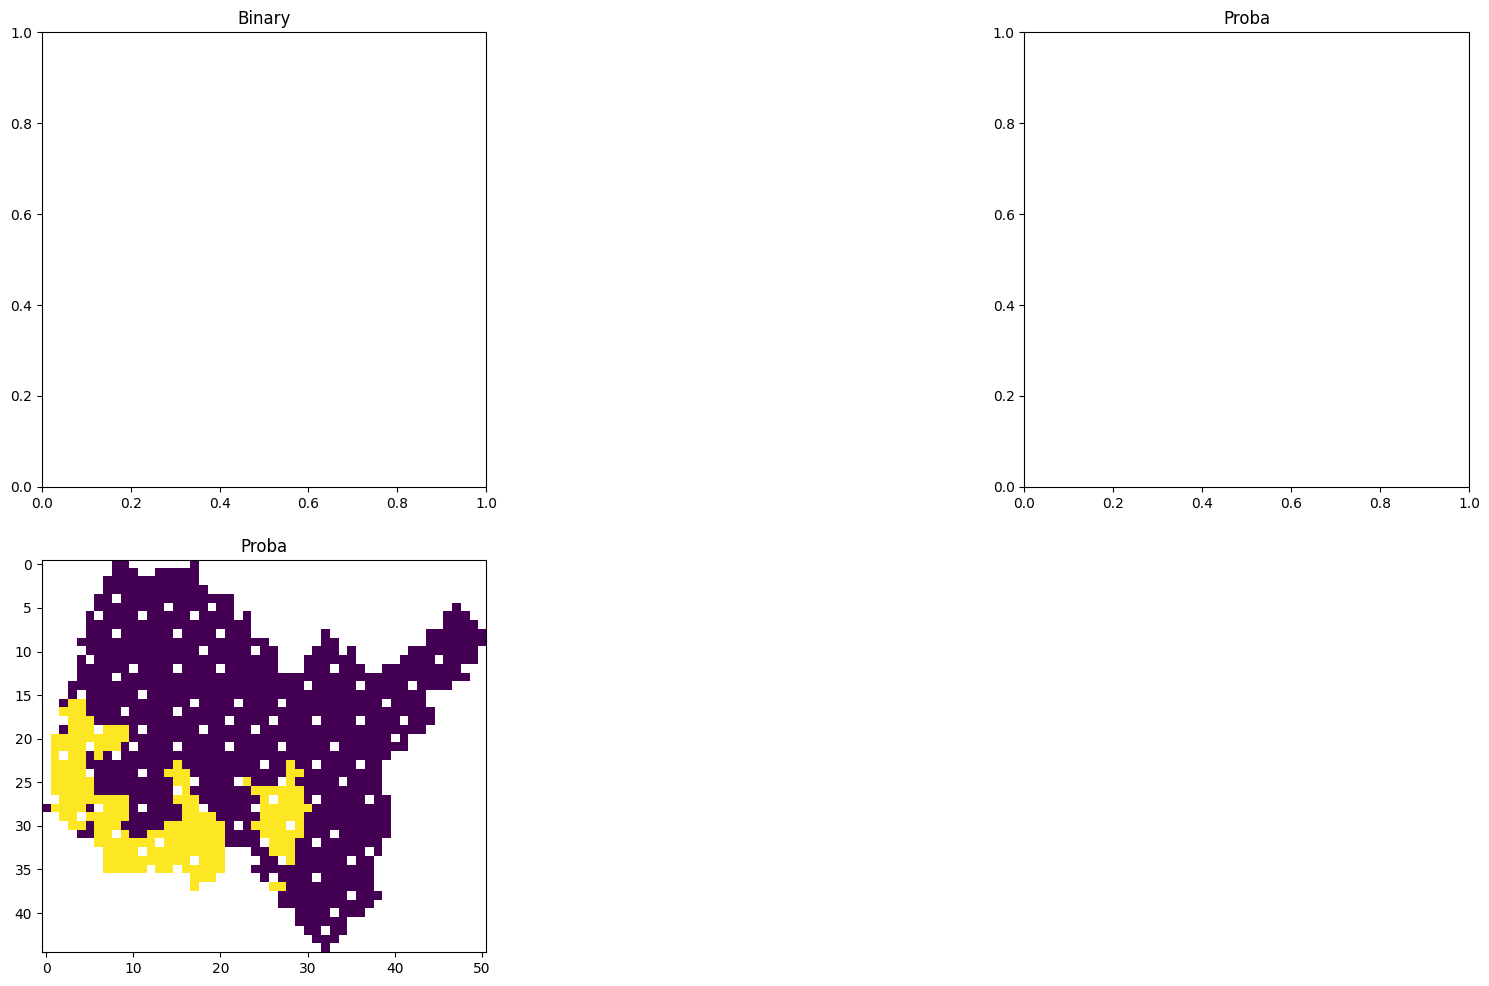

In [16]:
dir_dataset = Path('firemen/firepoint/2x2/train')
departement = 'departement-01-ain'

name = departement+'binScale5'+'.pkl'
#bin = pickle.load(open(dir_dataset / 'bin' / '2x2' / name, 'rb'))

name = departement+'rasterScale10_risk-watershed'+'.pkl'
raster = pickle.load(open(dir_dataset / 'raster' / name, 'rb'))
m = np.isnan(raster)

name = departement+'influence'+'.pkl'
#proba10 = pickle.load(open(dir_dataset / '../../log/' / name, 'rb'))

fig = plt.figure(figsize=(15,15))

temporalIndex = 198

ax = fig.add_subplot(331)
#ax.imshow(bin[:,:, temporalIndex], cmap='jet')
ax.set_title('Binary')  
ax = fig.add_subplot(333)
#ax.imshow(proba10[:,:,temporalIndex], cmap='jet', vmin=0, vmax=np.nanmax(proba10))
ax.set_title('Proba')
ax = fig.add_subplot(334)
im = (raster == 2).astype(float)
im[m] = np.nan
ax.imshow(im)
ax.set_title('Proba')
plt.tight_layout()

-0.7712443 0.8655579


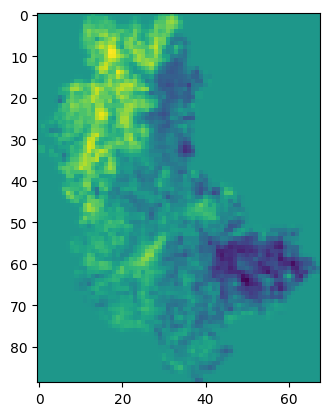

In [ ]:
pop = read_object('summer.pkl', Path('test/69/2D'))
print(np.min(pop), np.max(pop))
plt.imshow(pop[1, :,:])

0.02279853982910449 0.1859829009789373
(3661,)


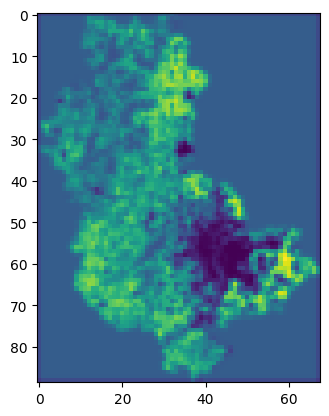

In [ ]:
pop = read_object('landcover.pkl', Path('test/69/2D'))
print(np.nanmin(pop), np.nanmax(pop)), print(np.unique(pop).shape)
plt.imshow(pop)

In [ ]:
landcover_encoder = read_object('encoder_landcover.pkl', Path('Encoder'))
landcover_encoder.transform([3])

,0
0,0.114528


0.048640198418870566 0.18489370048183457 [0.0486402  0.05894604 0.06654898 0.06964351 0.07095379 0.07348223
 0.08047545 0.08178656 0.09222849 0.09738813 0.09901447 0.11394729
 0.15660794 0.1848937 ]


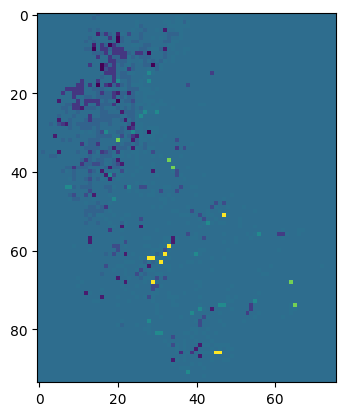

In [ ]:
pop = read_object('foret.pkl', Path('test/69/2D'))
print(np.nanmin(pop), np.nanmax(pop), np.unique(pop))
plt.imshow(pop)

In [ ]:
foret_encoder = read_object('encoder_foret.pkl', Path('Encoder'))
foret_encoder.transform([5])

,0
0,0.107679


0.4231158494949341 0.8377962112426758


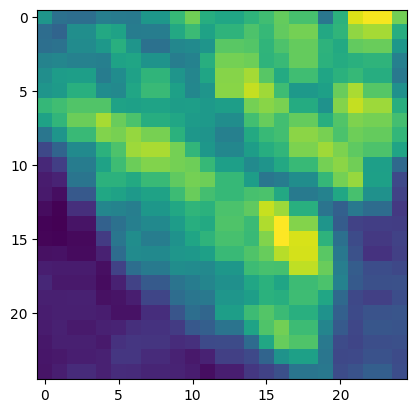

In [ ]:
featureTest = 'sentinel'
plt.imshow(array[:,:,features_name.index(featureTest) + 6])
print(array[:,:,features_name.index(featureTest)].min(),array[:,:,features_name.index(featureTest)].max())

(51, 48)


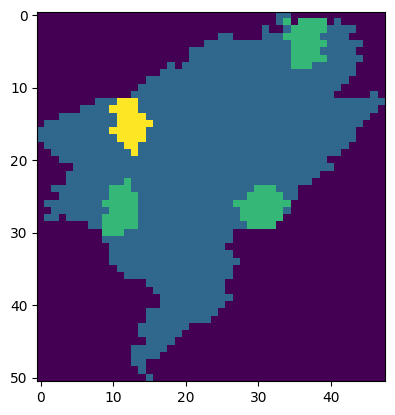

In [ ]:
testBin = read_object('testBin.pkl', Path('./'))
print(testBin.shape)
plt.imshow(testBin[:,:])